In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load Data

In [2]:
df = pd.read_csv(r'C:\Users\Datasets\medical_insurance.csv')
df

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# EDA:

1.understanding the data:

In [3]:
df.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   gender    1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.dtypes

age           int64
gender       object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
df.shape

(1338, 7)

In [8]:
df.columns

Index(['age', 'gender', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

2.checking unique values:

In [14]:
df.nunique()

age           47
gender         2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

3.checking null values:

In [16]:
df.isna().sum()

age         0
gender      0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [17]:
df.isna().mean()*100

age         0.0
gender      0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

4.checking duplicates values:

In [19]:
df.duplicated().sum()

1

In [20]:
df[df.duplicated()]

,age,gender,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


5.numeric columns and categorical columns:

In [21]:
numeric_columns = df.describe(include='int')
numeric_columns

,age,children
count,1338.000000,1338.000000
mean,39.207025,1.094918
std,14.049960,1.205493
min,18.000000,0.000000
25%,27.000000,0.000000
50%,39.000000,1.000000
75%,51.000000,2.000000
max,64.000000,5.000000


In [22]:
categorical_columns = df.describe(include='object')
categorical_columns

,gender,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


6. check columns values:

In [24]:
df['gender'].value_counts()

male      676
female    662
Name: gender, dtype: int64

In [25]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [26]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [27]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

# Data Cleaning:

In [28]:
df

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


drop duplicates records

In [30]:
df.drop_duplicates(inplace=True)

In [31]:
df.duplicated().sum()

0

# Data Transformation:

In [48]:
def age_group(ages):
    lst = []
    for age in ages:
        if(age<=30):
            lst.append('18-30')
        elif(age<=40):
            lst.append('31-40')
        elif(age<=50):
            lst.append('41-50')
        elif(age<=60):
            lst.append('51-60')
        else:
            lst.append('above 60')
    return lst

In [49]:
df['age_group'] = age_group(df.age)

In [50]:
df

,age,gender,bmi,children,smoker,region,charges,age_group,BMI_Status
0,19,female,27.900,0,yes,southwest,16884.92400,18-30,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,18-30,Obesity
2,28,male,33.000,3,no,southeast,4449.46200,18-30,Obesity
3,33,male,22.705,0,no,northwest,21984.47061,31-40,Normal
4,32,male,28.880,0,no,northwest,3866.85520,31-40,Overweight
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,41-50,Obesity
1334,18,female,31.920,0,no,northeast,2205.98080,18-30,Obesity
1335,18,female,36.850,0,no,southeast,1629.83350,18-30,Obesity
1336,21,female,25.800,0,no,southwest,2007.94500,18-30,Overweight


In [51]:
def bmi_group(bmi_list):
    bmi_lst = []
    for bmi in bmi_list:
        if(bmi<=18.5):
            bmi_lst.append('Underweight')
        elif(bmi>=18.5) & (bmi<=24.9):
            bmi_lst.append('Normal')
        elif(bmi>=25) & (bmi<=29.9):
            bmi_lst.append('Overweight')
        else:
            bmi_lst.append('Obesity')
    return bmi_lst

In [52]:
df['BMI_Status'] = bmi_group(df.bmi)

In [53]:
df

,age,gender,bmi,children,smoker,region,charges,age_group,BMI_Status
0,19,female,27.900,0,yes,southwest,16884.92400,18-30,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,18-30,Obesity
2,28,male,33.000,3,no,southeast,4449.46200,18-30,Obesity
3,33,male,22.705,0,no,northwest,21984.47061,31-40,Normal
4,32,male,28.880,0,no,northwest,3866.85520,31-40,Overweight
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,41-50,Obesity
1334,18,female,31.920,0,no,northeast,2205.98080,18-30,Obesity
1335,18,female,36.850,0,no,southeast,1629.83350,18-30,Obesity
1336,21,female,25.800,0,no,southwest,2007.94500,18-30,Overweight


# Transformed Data:

In [54]:
df

,age,gender,bmi,children,smoker,region,charges,age_group,BMI_Status
0,19,female,27.900,0,yes,southwest,16884.92400,18-30,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,18-30,Obesity
2,28,male,33.000,3,no,southeast,4449.46200,18-30,Obesity
3,33,male,22.705,0,no,northwest,21984.47061,31-40,Normal
4,32,male,28.880,0,no,northwest,3866.85520,31-40,Overweight
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,41-50,Obesity
1334,18,female,31.920,0,no,northeast,2205.98080,18-30,Obesity
1335,18,female,36.850,0,no,southeast,1629.83350,18-30,Obesity
1336,21,female,25.800,0,no,southwest,2007.94500,18-30,Overweight


# Data Analysis and Distribution of Data:

univariant and bivariant analysis for numeric and categorical features:

1. univariant analysis for numeric features

In [99]:
numeric_columns = df[['age','bmi','children','charges']]
numeric_columns

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


<AxesSubplot:xlabel='age', ylabel='Count'>

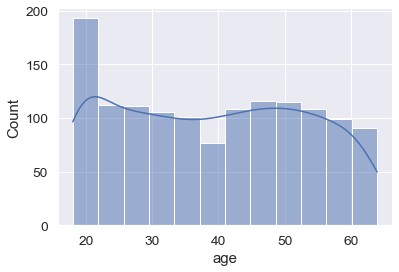

In [102]:
sns.histplot(df['age'],kde=True)

<AxesSubplot:xlabel='bmi', ylabel='Count'>

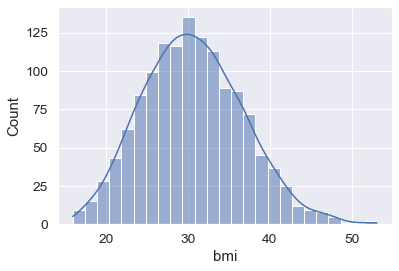

In [103]:
sns.histplot(df['bmi'],kde=True)

<AxesSubplot:xlabel='children', ylabel='Count'>

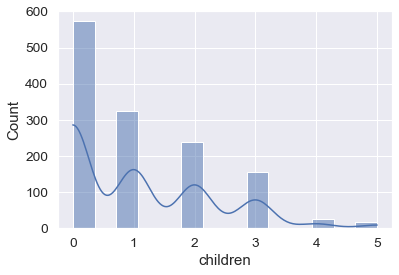

In [104]:
sns.histplot(df['children'],kde=True)

<AxesSubplot:xlabel='charges', ylabel='Count'>

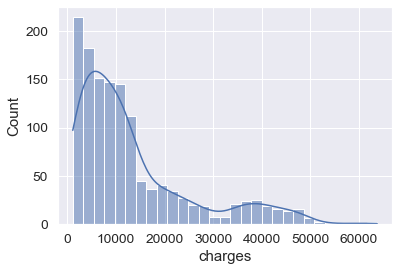

In [105]:
sns.histplot(df['charges'],kde=True)

Conclusion: The BMI column has a symmetrical data distribution, while the other columns have skewed data.

2.univariate analysis for categorical columns

In [109]:
categorical_columns = df[['gender','smoker','region','BMI_Status']]
categorical_columns

,gender,smoker,region,BMI_Status
0,female,yes,southwest,Overweight
1,male,no,southeast,Obesity
2,male,no,southeast,Obesity
3,male,no,northwest,Normal
4,male,no,northwest,Overweight
...,...,...,...,...
1333,male,no,northwest,Obesity
1334,female,no,northeast,Obesity
1335,female,no,southeast,Obesity
1336,female,no,southwest,Overweight


<AxesSubplot:xlabel='gender', ylabel='count'>

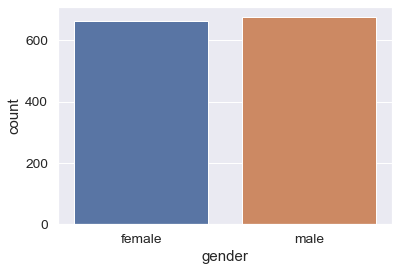

In [110]:
sns.countplot(categorical_columns.gender)

<AxesSubplot:xlabel='smoker', ylabel='count'>

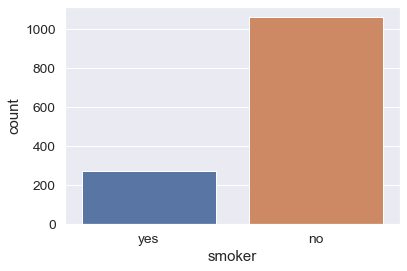

In [111]:
sns.countplot(categorical_columns.smoker)

<AxesSubplot:xlabel='region', ylabel='count'>

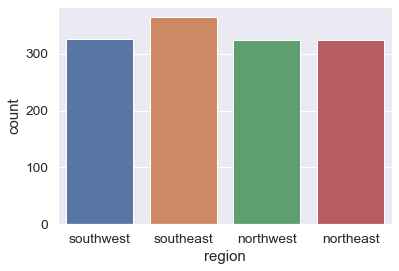

In [112]:
sns.countplot(categorical_columns.region)

<AxesSubplot:xlabel='BMI_Status', ylabel='count'>

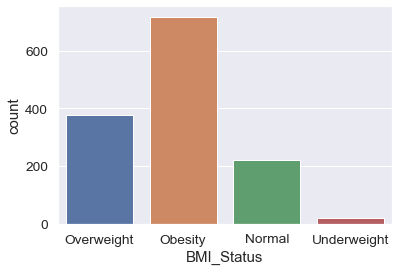

In [113]:
sns.countplot(categorical_columns.BMI_Status)

Conclusion: A high percentage of obese individuals are present in the given dataset.

3.bivariate analysis for numericals columns:

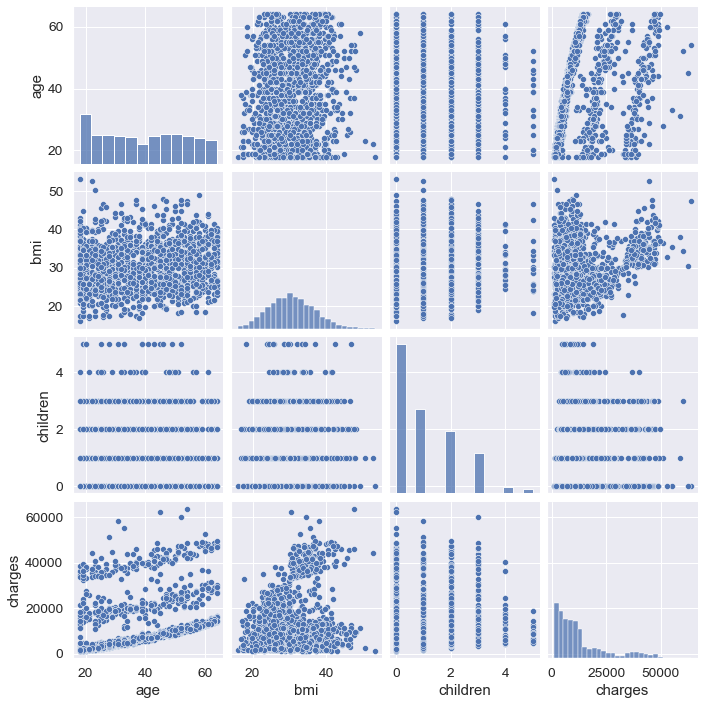

In [115]:
sns.pairplot(numeric_columns)

Conclusion: The scatterplot of age vs. charges, BMI vs. charges, and BMI vs. age shows a slightly linear relation with
            each other.

4.bivariate analysis for categorical columns:

<AxesSubplot:xlabel='gender', ylabel='count'>

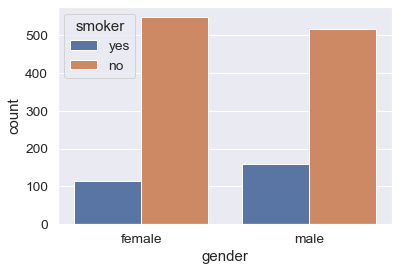

In [118]:
sns.countplot(data=categorical_columns,x='gender',hue='smoker')

Conclusion: The percentage of smokers among females is very high compared to males.

<AxesSubplot:xlabel='gender', ylabel='count'>

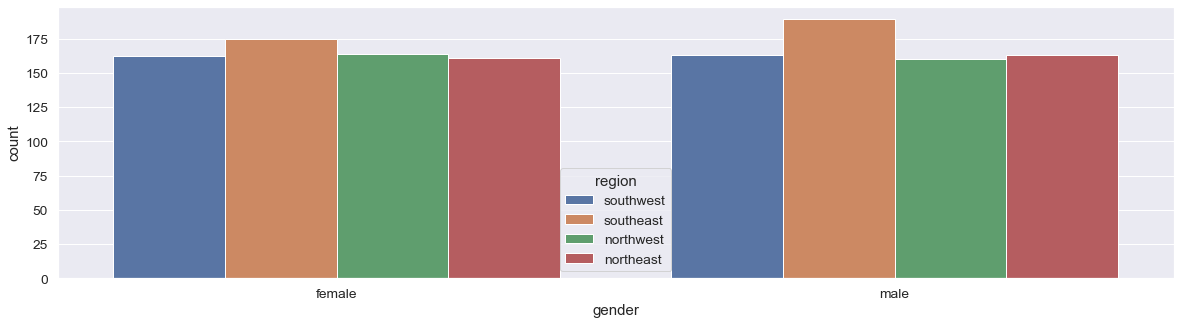

In [121]:
plt.figure(figsize=(20,5))
sns.countplot(data=categorical_columns,x='gender',hue='region')

<AxesSubplot:xlabel='gender', ylabel='count'>

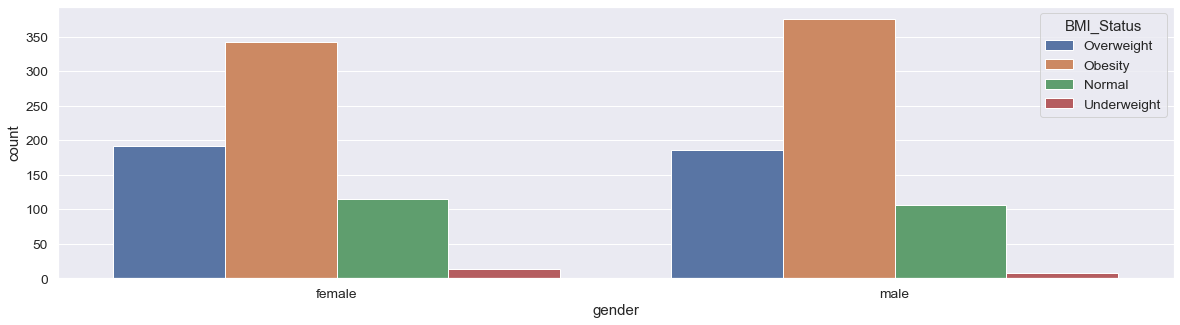

In [123]:
plt.figure(figsize=(20,5))
sns.countplot(data=categorical_columns,x='gender',hue='BMI_Status')

Conclusion : Obesity in males is slightly greater than in females.

<AxesSubplot:xlabel='smoker', ylabel='count'>

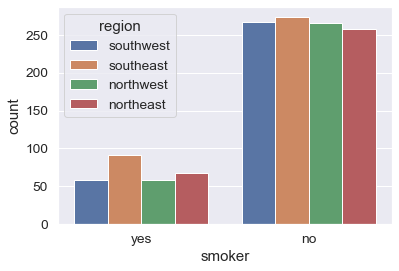

In [124]:
sns.countplot(data=categorical_columns,x='smoker',hue='region')

Conclusion : The percentage of smokers in the Southeast region is higher compared to other regions.

<AxesSubplot:xlabel='smoker', ylabel='count'>

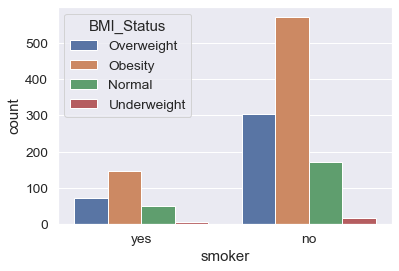

In [126]:
sns.countplot(data=categorical_columns,x='smoker',hue='BMI_Status')

Conclusion : The percentage of smokers in obese individuals is higher compared to other groups

<AxesSubplot:xlabel='region', ylabel='count'>

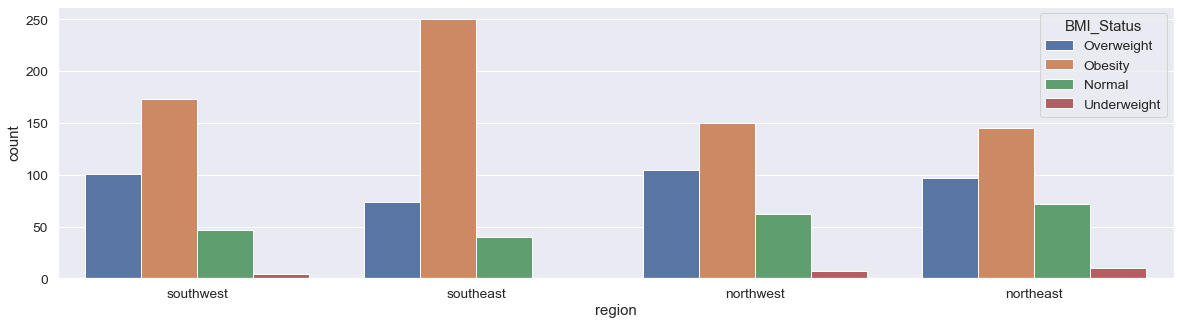

In [128]:
plt.figure(figsize=(20,5))
sns.countplot(data=categorical_columns,x='region',hue='BMI_Status')

Conclusion : Obesity percentage in the Southeast region is higher than in other regions.

# Distribution of Data using violinplot :

<AxesSubplot:xlabel='age'>

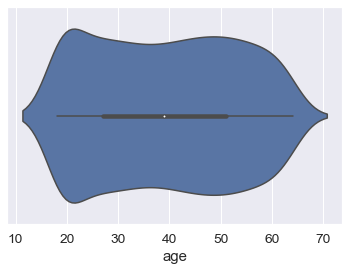

In [129]:
sns.violinplot(df['age'])

<AxesSubplot:xlabel='bmi'>

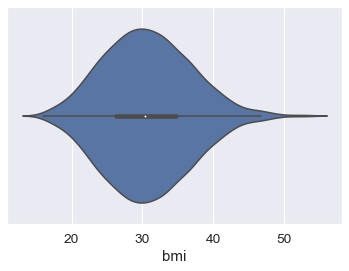

In [132]:
sns.violinplot(df['bmi'])

<AxesSubplot:xlabel='children'>

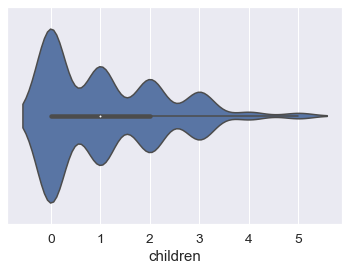

In [134]:
sns.violinplot(df['children'])

<AxesSubplot:xlabel='charges'>

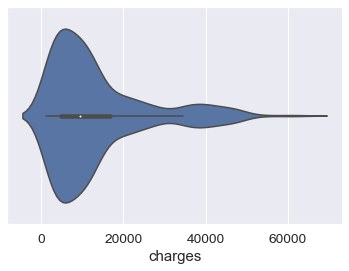

In [135]:
sns.violinplot(df['charges'])

# Distribution of Data using kde plot:

<AxesSubplot:xlabel='age', ylabel='Density'>

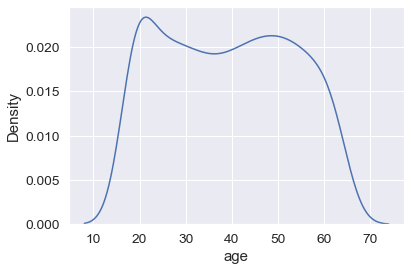

In [138]:
sns.kdeplot(df['age'])

<AxesSubplot:xlabel='bmi', ylabel='Density'>

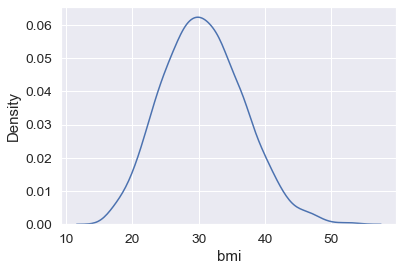

In [139]:
sns.kdeplot(df['bmi'])

<AxesSubplot:xlabel='children', ylabel='Density'>

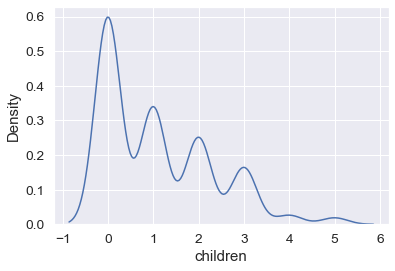

In [140]:
sns.kdeplot(df['children'])

<AxesSubplot:xlabel='charges', ylabel='Density'>

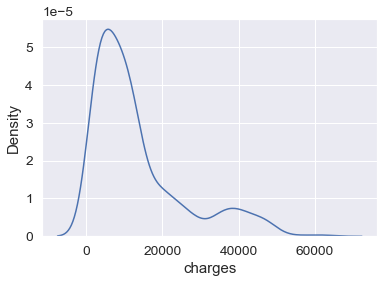

In [141]:
sns.kdeplot(df['charges'])

# Data Visualisation:

<AxesSubplot:xlabel='age_group', ylabel='count'>

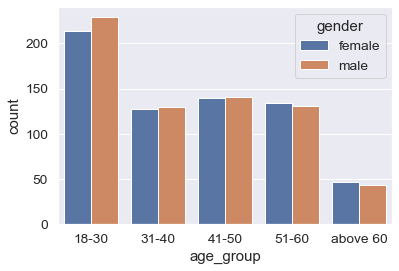

In [55]:
sns.set(font_scale=1.25)
sns.countplot(x=df['age_group'],hue=df['gender'])

Conclusion : peoples are more likely to take insurence in the age group 18-30

In [56]:
# Who has taken more insurance policies - smokers or non-smokers?

<AxesSubplot:xlabel='age_group', ylabel='count'>

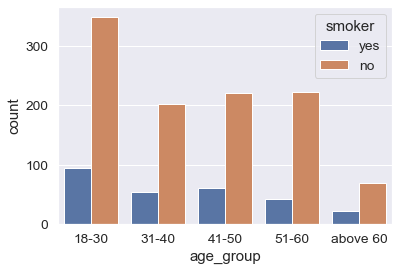

In [58]:
sns.countplot(x=df["age_group"], hue=df["smoker"])

Conclusion : Insurance taken more by those who don't  smoke

In [59]:
# show all analysis according to age group

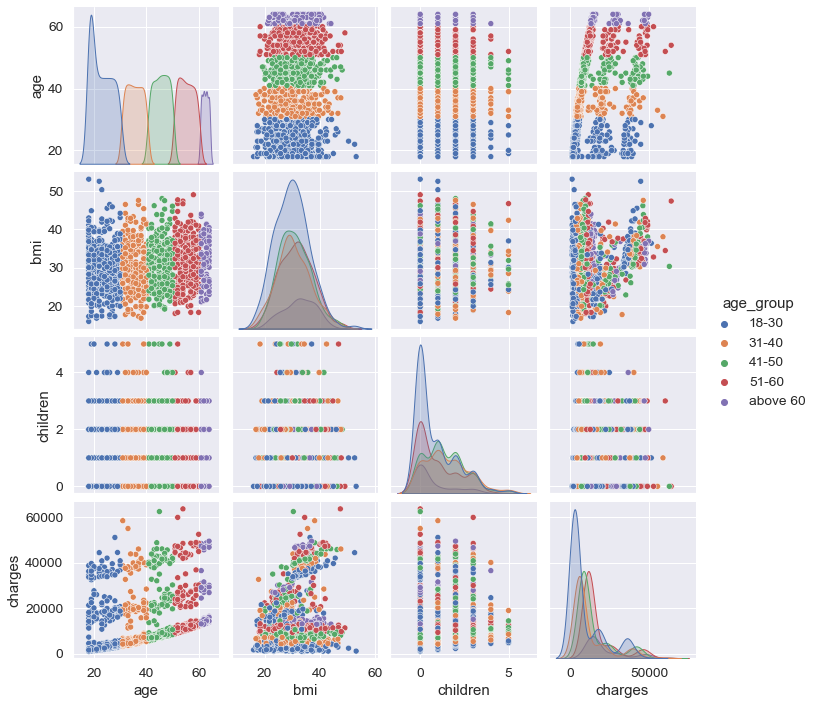

In [60]:
sns.pairplot(df,hue="age_group")

In [97]:
# Has the smoker status and age affected the charges?

Text(0.5, 1.0, 'Normal')

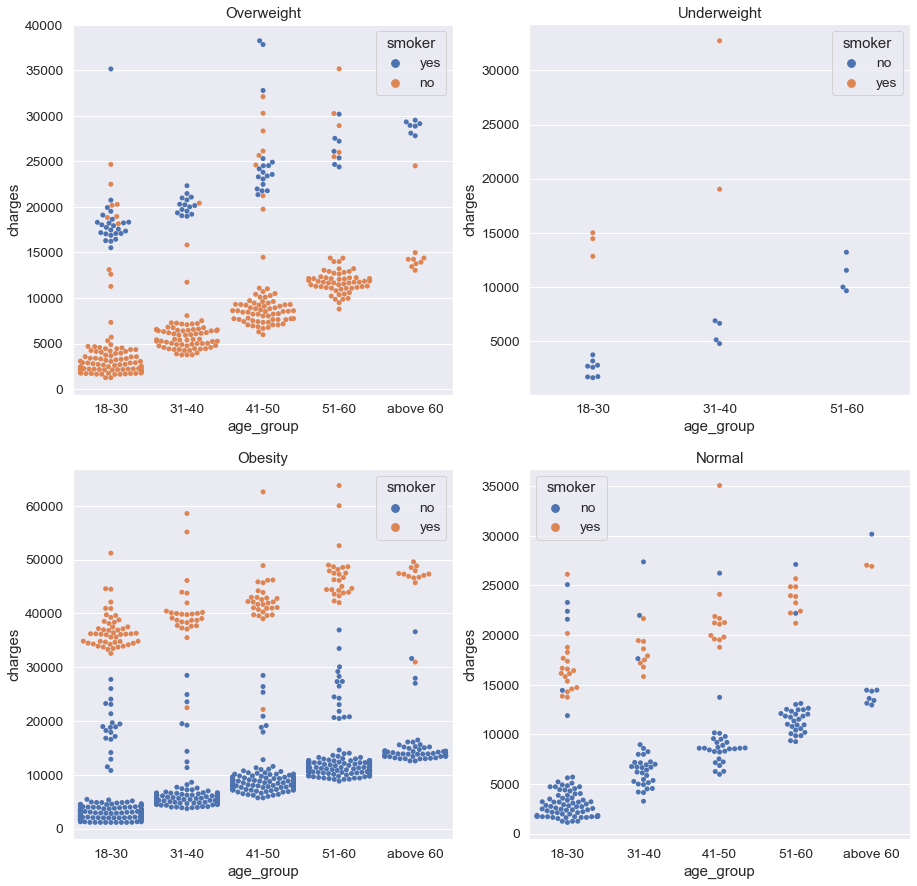

In [65]:
Overweight_df=df.loc[df["BMI_Status"]=="Overweight"].sort_values(by="age_group")
Underweight_df=df.loc[df["BMI_Status"]=="Underweight"].sort_values(by="age_group")
Obesity_df=df.loc[df["BMI_Status"]=="Obesity"].sort_values(by="age_group")
Normal_df=df.loc[df["BMI_Status"]=="Normal"].sort_values(by="age_group")
fig,axes=plt.subplots(2,2,figsize=(15,15))
sns.swarmplot(x="age_group", y="charges", data=Overweight_df, ax=axes[0,0],hue="smoker")
axes[0,0].set_title("Overweight")
sns.swarmplot(x="age_group", y="charges", data=Underweight_df, ax=axes[0,1],hue="smoker")
axes[0,1].set_title("Underweight")
sns.swarmplot(x="age_group", y="charges", data=Obesity_df, ax=axes[1,0],hue="smoker")
axes[1,0].set_title("Obesity")
sns.swarmplot(x="age_group", y="charges", data=Normal_df, ax=axes[1,1],hue="smoker")
axes[1,1].set_title("Normal")
#plt.legend(bbox_to_anchor=(1.25,1))

Conclusion : Yes, smoking will effecting on charges. A person who smokes,he has to pay more charges as compare to 
             non- smokers and also if age is increasing then charges will also increse

In [66]:
# Which BMI status pays more charges?

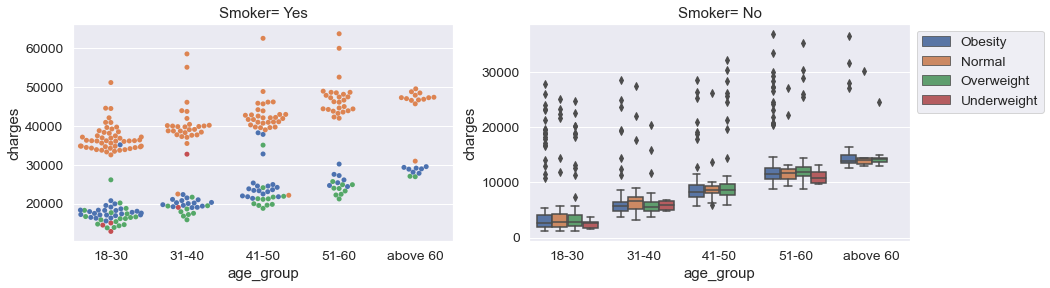

In [69]:
yes_df=df.loc[df.smoker=="yes"].sort_values(by="age_group")
no_df=df.loc[df.smoker=="no"].sort_values(by="age_group")
fig,axes=plt.subplots(1,2,figsize=(15,4))
a=sns.swarmplot(x="age_group", y="charges", data=yes_df, ax=axes[0],hue="BMI_Status")
axes[0].set_title("Smoker= Yes") 
a.get_legend().remove()
#a.legend(bbox_to_anchor=(1.25,1))
sns.boxplot(x="age_group", y="charges", data=no_df, ax=axes[1],hue="BMI_Status")
axes[1].set_title("Smoker= No")
plt.legend(bbox_to_anchor=(1,1))

Conclusion : A person who is under the obesity BMI status,he has to pay more chareges 

In [70]:
# Show BMI status according to gender with charges

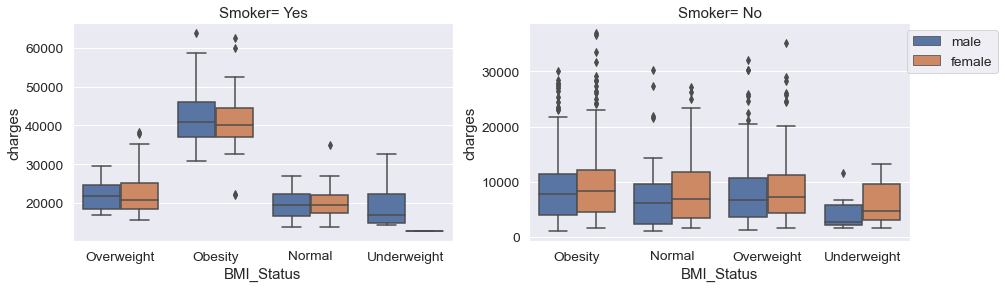

In [72]:
fig,axes=plt.subplots(1,2,figsize=(15,4))
a=sns.boxplot(x="BMI_Status", y="charges", data=yes_df, ax=axes[0],hue="gender")
axes[0].set_title("Smoker= Yes") 
a.get_legend().remove()
sns.boxplot(x="BMI_Status", y="charges", data=no_df, ax=axes[1],hue="gender")
axes[1].set_title("Smoker= No")
plt.legend(bbox_to_anchor=(1.25,1))

Conculsion : Females do smoking in Overweight,Obesity and Normal BMI Status than Males

In [96]:
# Do children affect the charges?

Text(0.5, 1.0, 'Smoker= No')

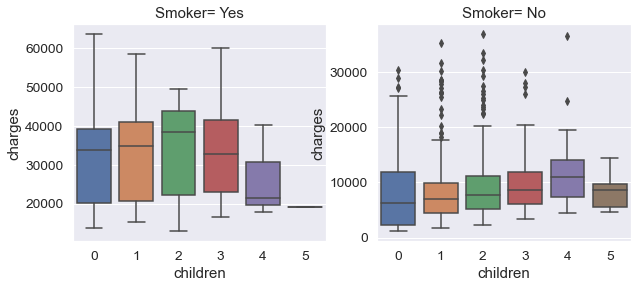

In [75]:
fig,axes=plt.subplots(1,2,figsize=(10,4))
sns.boxplot(x="children", y="charges", data=yes_df, ax=axes[0])
axes[0].set_title("Smoker= Yes")
sns.boxplot(x="children", y="charges", data=no_df, ax=axes[1])
axes[1].set_title("Smoker= No")

Conculsion : Yes, "Charges" are being affected because of the children. If the number of children is increasing, then the                charges are also increasing.

In [76]:
# In which region do insurance companies make the most money?

Text(0.5, 1.0, 'Total amount')

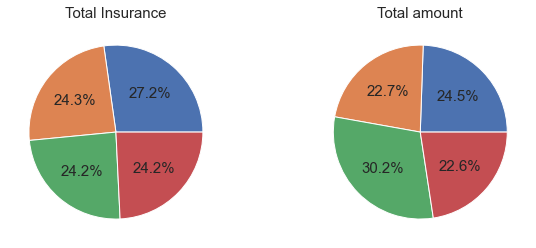

In [78]:
fig,axes=plt.subplots(1,2,figsize=(10,4))
charge_df=df.assign(Amount=lambda x:(x["charges"]/100000)).sort_values(by=["region"])
a=charge_df['region'].value_counts().plot(kind='pie',labels=None, autopct='%1.1f%%',ax=axes[0])
axes[0].set_title("Total Insurance") 
a.yaxis.set_visible(False)
charge_df.groupby("region")["Amount"].sum().plot(kind='pie',labels=None, autopct='%1.1f%%',ax=axes[1])
plt.ylabel("")
axes[1].set_title("Total amount")

Conculsion : The Southeast region has earned more money than the other regions and also has more insured individuals.

Text(0.5, 1.0, 'southwest')

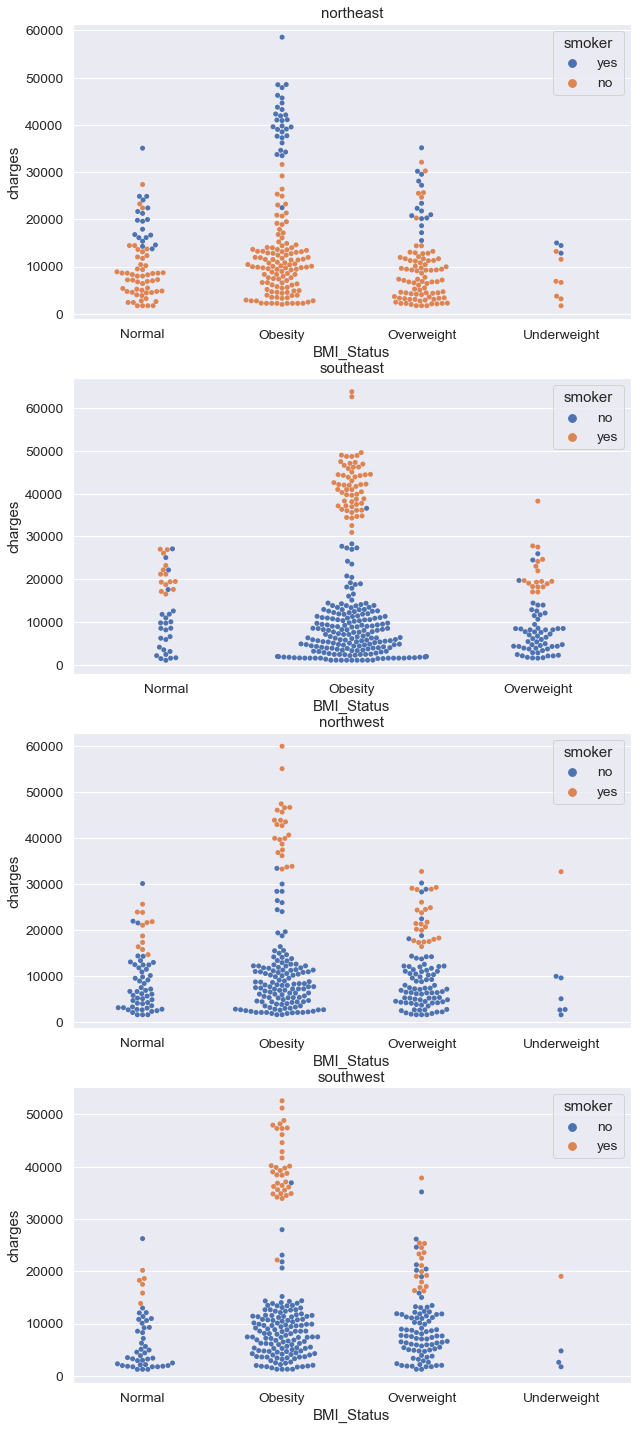

In [79]:
fig,axes=plt.subplots(4,figsize=(10,25))
regin_df=df.loc[df.region=="northeast"].sort_values(by="BMI_Status")
sns.swarmplot(x="BMI_Status", y="charges", data=regin_df, ax=axes[0],hue="smoker")
axes[0].set_title("northeast")
regin_df=df.loc[df.region=="southeast"].sort_values(by="BMI_Status")
sns.swarmplot(x="BMI_Status", y="charges", data=regin_df, ax=axes[1],hue="smoker")
axes[1].set_title("southeast")
regin_df=df.loc[df.region=="northwest"].sort_values(by="BMI_Status")
sns.swarmplot(x="BMI_Status", y="charges", data=regin_df, ax=axes[2],hue="smoker")
axes[2].set_title("northwest")
regin_df=df.loc[df.region=="southwest"].sort_values(by="BMI_Status")
sns.swarmplot(x="BMI_Status", y="charges", data=regin_df, ax=axes[3],hue="smoker")
axes[3].set_title("southwest")

In [80]:
# Top 5 costly insurance

In [82]:
max_charges_df=df[["age_group","gender","smoker","region","BMI_Status","charges"]]
max_charges_df.style.background_gradient(cmap = 'coolwarm')

,age_group,gender,smoker,region,BMI_Status,charges
0,18-30,female,yes,southwest,Overweight,16884.924000
1,18-30,male,no,southeast,Obesity,1725.552300
2,18-30,male,no,southeast,Obesity,4449.462000
3,31-40,male,no,northwest,Normal,21984.470610
4,31-40,male,no,northwest,Overweight,3866.855200
5,31-40,female,no,southeast,Overweight,3756.621600
6,41-50,female,no,southeast,Obesity,8240.589600
7,31-40,female,no,northwest,Overweight,7281.505600
8,31-40,male,no,northeast,Overweight,6406.410700
9,51-60,female,no,northwest,Overweight,28923.136920


In [90]:
# Top costly insurance

In [89]:
max_charges_df=df[["age_group","gender","smoker","region","BMI_Status","charges"]].sort_values('charges',ascending=False)
max_charges_df.style.background_gradient(cmap = 'coolwarm')

,age_group,gender,smoker,region,BMI_Status,charges
543,51-60,female,yes,southeast,Obesity,63770.428010
1300,41-50,male,yes,southeast,Obesity,62592.873090
1230,51-60,male,yes,northwest,Obesity,60021.398970
577,31-40,female,yes,northeast,Obesity,58571.074480
819,31-40,female,yes,northwest,Obesity,55135.402090
1146,51-60,male,yes,southwest,Obesity,52590.829390
34,18-30,male,yes,southwest,Obesity,51194.559140
1241,above 60,male,yes,southeast,Obesity,49577.662400
1062,51-60,male,yes,southeast,Obesity,48970.247600
488,41-50,female,yes,southeast,Obesity,48885.135610


Conculsion : The top 5 most expensive individuals are smokers and have obesity, according to their BMI status.

In [91]:
# Top costly insurance using barplot

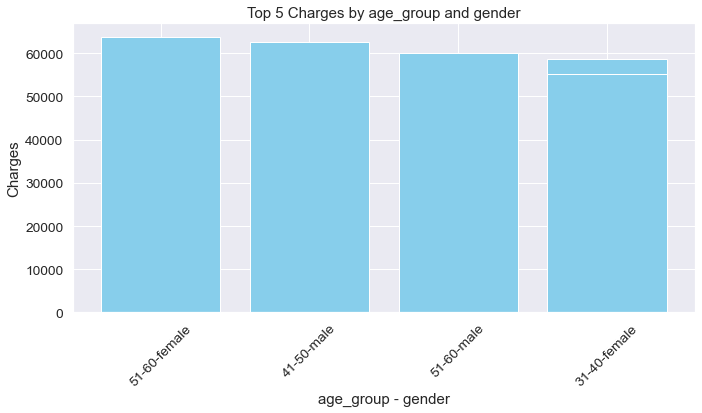

In [86]:
max_charges_df = df[["age_group", "gender", "smoker", "region", "BMI_Status", "charges"]]

# Sort the DataFrame by "charges" column in descending order
max_charges_df = max_charges_df.sort_values(by="charges", ascending=False)

# Display the DataFrame with background gradient using 'coolwarm' colormap
styled_max_charges_df = max_charges_df.style.background_gradient(cmap='coolwarm')

# Show the styled DataFrame
print(styled_max_charges_df)


# Optionally, we can also plot a bar chart to visualize the top charges
plt.figure(figsize=(10, 6))
top_n = 5  # Change this to the number of top charges you want to visualize
top_charges = max_charges_df.head(top_n)
plt.bar(top_charges["age_group"] + "-" + top_charges["gender"], top_charges["charges"], color="skyblue")
plt.xlabel("age_group - gender")
plt.ylabel("Charges")
plt.title(f"Top {top_n} Charges by age_group and gender")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [95]:
# Mostly charges lie within which range?

Text(0.5, 0, 'Charges')

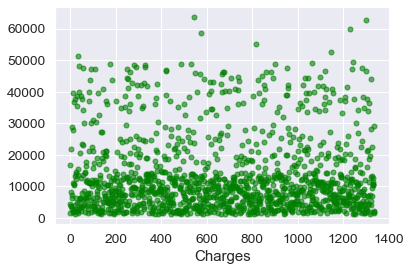

In [93]:
plt.plot(df["charges"], '.', alpha=0.6, markersize=10, color="green")
plt.xlabel('Charges')

Conclusion : The maximum charge is above 60000, and mostly charges lie under 15000.